# Wine dataset - FIC0024

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

### Přehled dat

Na první pohled data set obsahuje výsledky chemické analízy vína

### Dataset v číslech

Dataset obsahuje celkem 178 záznamů a z 13 atributů, nad kterými lze provádět analyza.

### Popis argumentů
- Alcohol - obsah alkoholu v procentech
- Malic acid - obsah kyseliny jablečné (svěží a ostrá chuť)
- Ash - obsah popela
- Alcalinity of ash - zásaditost popela
- Magnesium - obsah hořčíku
- Total phenols - celkový obsah fenolů (chuť a barva)
- Flavanoids - obsah flavonoidů (hořkost)
- Nonflavanoid phenols - obsah ne-flavonoidních fenolů (barva a chuť)
- Proanthocyanins - zodpovědné za síravost vína
- Color intensity - intenzita barvy
- Hue - odstín vína
- OD280/OD315 of diluted wines - optická hustota při 280/315 nm
- Proline - obsah prolinu (chuť)

In [3]:
df_full = pd.read_csv('wine-clustering.csv', sep=',')
df_full

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Integrita dat

Když se podíváme, tak dataset neobsahuje žádné chybějící hodnoty, takže se nemusíme starat o nějaké dropování nebo doplňování hodnot.

In [4]:
df_full.isna().sum().sort_values(ascending=False)

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


Při pohledu na statistiku lze pozorovat následující charakteristiky:

- Dataset obsahuje 178 pozorování a všechny sloupce mají plný počet hodnot (bez NaN).

- Rozpětí hodnot se u jednotlivých atributů liší — například:

    - Alcohol má hodnoty v rozmezí 11,03–14,83 %, což ukazuje přirozenou variabilitu mezi druhy vín.

    - Proline vykazuje velké rozmezí (278–1680 mg/l), což může naznačovat rozdíly v odrůdách hroznů nebo výrobních postupech.

    - Většina proměnných má malý směrodatný rozptyl, což znamená, že data jsou poměrně homogenní.

Medián je u většiny proměnných blízko průměru → rozložení hodnot je přibližně symetrické, bez výrazných odlehlých hodnot.

In [6]:
df_full.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
df_full['Alcohol'].describe()

count    178.000000
mean      13.000618
std        0.811827
min       11.030000
25%       12.362500
50%       13.050000
75%       13.677500
max       14.830000
Name: Alcohol, dtype: float64

In [8]:
df_full['Proline'].describe()

count     178.000000
mean      746.893258
std       314.907474
min       278.000000
25%       500.500000
50%       673.500000
75%       985.000000
max      1680.000000
Name: Proline, dtype: float64

## Analýza rozložení atributu Alcohol

Na histogramu vlevo je znázorněno rozložení hodnot obsahu alkoholu ve vzorcích vína. Rozsah se pohybuje přibližně od 11,0 % do 14,8 %, přičemž nejvíce vzorků se soustředí mezi 12,5 % a 13,5 %.

Rozložení má přibližně symetrický tvar, což naznačuje, že hodnoty nejsou výrazně zkreslené (nejsou outliery ani extrémní odchylky).

Histogram svým tvarem připomíná Gaussovu křivku, avšak střední část je mírně rozšířená a ukazuje, že většina vín má obsah alkoholu přibližně kolem 13,75 %.

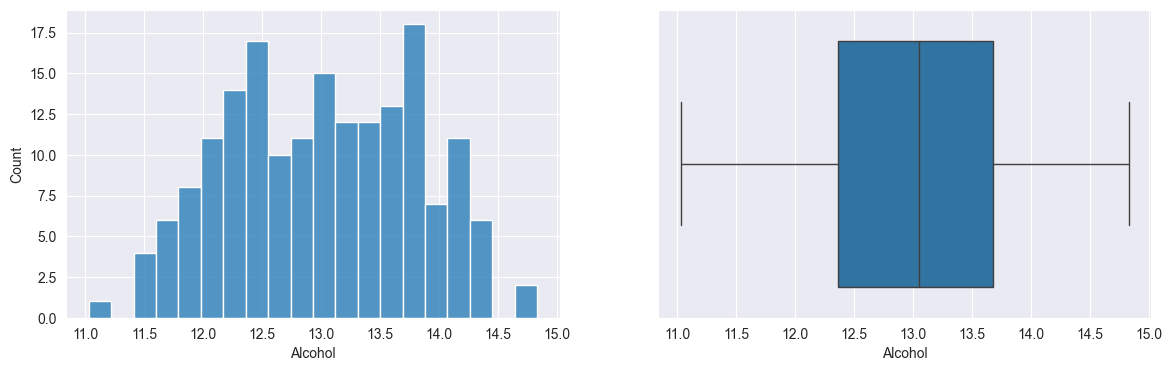

In [9]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sns.histplot(df_full["Alcohol"], bins=20)
plt.subplot(1, 2, 2)
sns.boxplot(x=df_full["Alcohol"])
plt.show()

Pro jistotu se podíváme také na další sloupec, tentokrát na množství hořčíku (Magnesium) ve víně.
Z histogramu je patrné, že většina hodnot se pohybuje v rozmezí 80–120 mg/l, přičemž nejčastější výskyt je kolem 85 mg/l.

Na boxplotu lze pozorovat několik odlehlých hodnot (outlierů), které leží mimo hlavní rozložení dat – konkrétně na vyšších hodnotách okolo 140 až 160 mg/l.
Při dalších analýzách tedy bude vhodné s těmito odlehlými hodnotami počítat, případně zvážit jejich vyloučení nebo úpravu podle kontextu dat.

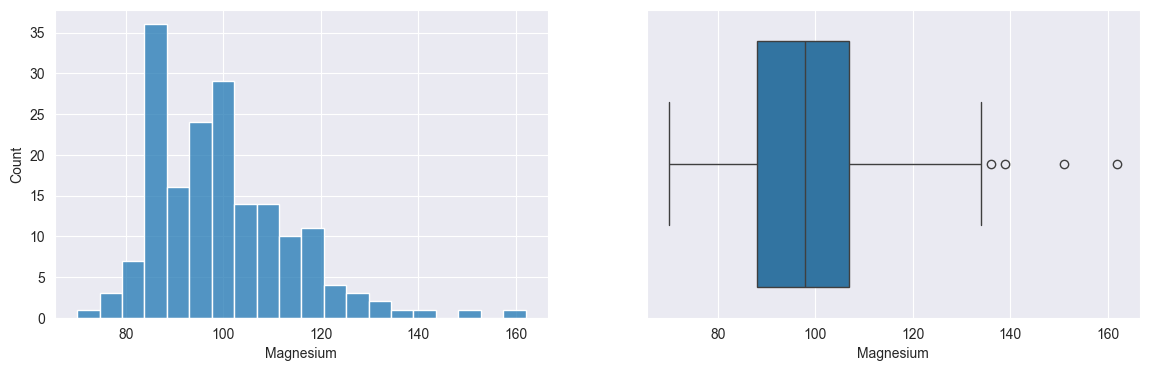

In [10]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sns.histplot(df_full["Magnesium"], bins=20)
plt.subplot(1, 2, 2)
sns.boxplot(x=df_full["Magnesium"])
plt.show()


Jelikož se u některých proměnných objevily odlehlé hodnoty (outliery), rozhodl jsem se provést kontrolu napříč všemi sloupci, abych zjistil, kde přesně se tyto hodnoty vyskytují.

Na níže uvedených grafech je vidět, že odlehlé hodnoty se objevují u následujících atributů:

- Malic_Acid
- Ash
- Ash_Alcanity
- Magnesium
- Proanthocyanins
- Color_Intensity
- Hue

Z toho vyplývá, že tyto proměnné mohou vyžadovat další pozornost při analýze — například při normalizaci, standardizaci nebo při rozhodování, zda outliery ponechat či odstranit. Zatím zde zkusím outliery nechat a když tak pokud budou v clusteringu dělat nepořádek.

13


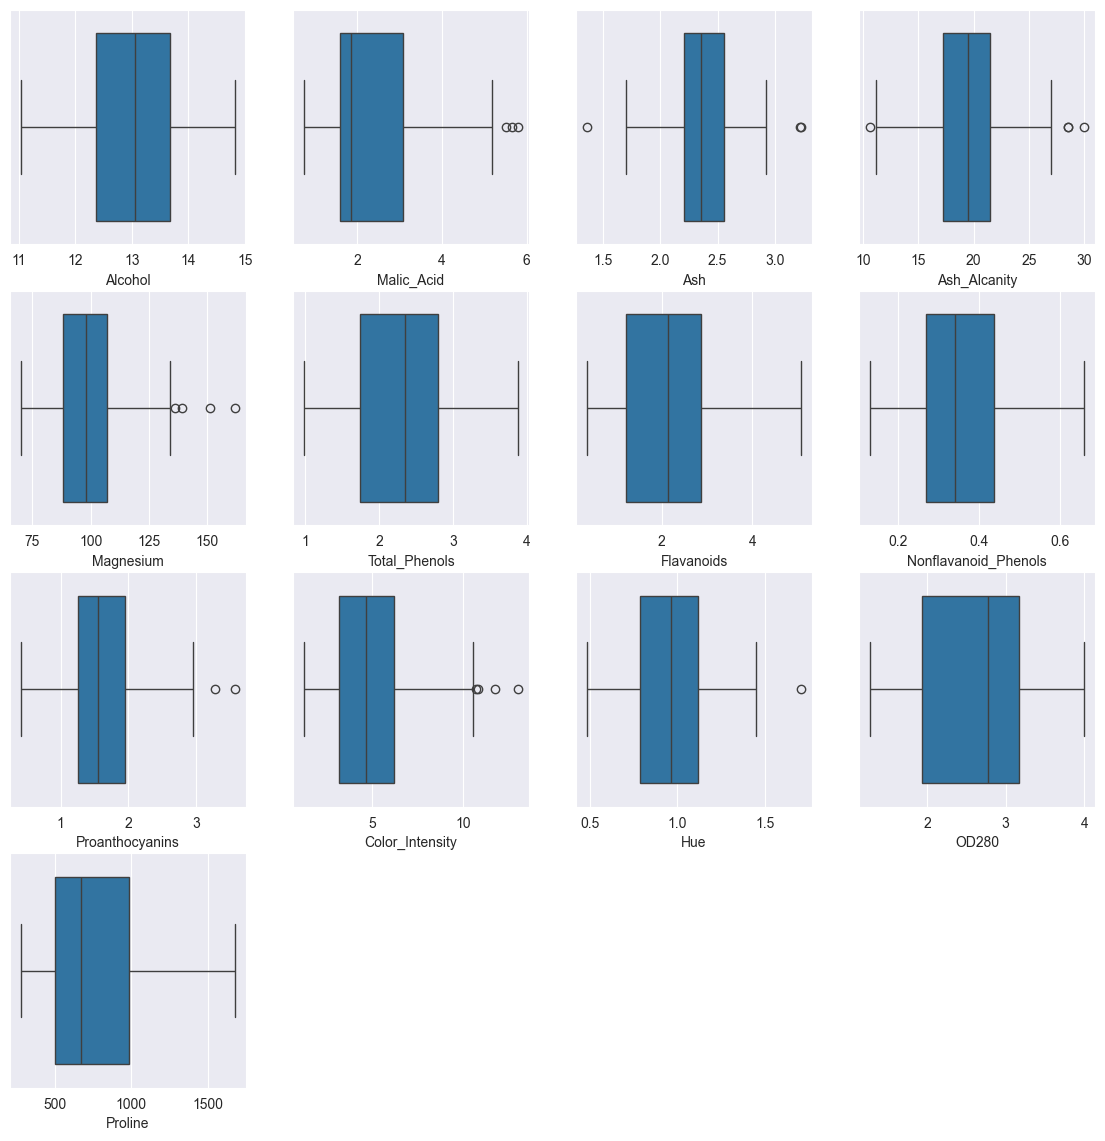

In [11]:
cols = df_full.columns

print(len(cols)) # 13 4x4

plt.figure(figsize=(14, 14))

i = 0
for col in cols:
    i = i + 1
    plt.subplot(4, 4, i)
    sns.boxplot(x=df_full[col])
plt.show()


### Kolerační matice

Nyní se pojďmě podívat na kolerační matici, abychom zjístil, jak jsou na sobě jednotlivé sloupce atributy závislé.

Z grafu je patrné, že některé proměnné spolu velmi silně korelují, zatímco jiné vykazují jen slabou nebo dokonce zápornou závislost.

Nejsilnější **pozitivní korelace** (tj. hodnoty blízké 1) jsou mezi:
- **Flavanoids** a **Total_Phenols** (r ≈ 0.86) – což naznačuje, že vína s vyšším obsahem flavonoidů mají také více celkových fenolů
- **OD280** a **Flavanoids** / **Total_Phenols** (r ≈ 0.79 a 0.70) – zde se potvrzuje jejich úzký vztah k chemickému složení vína
- **Alcohol** a **Proline** (r ≈ 0.64) – vína s vyšším obsahem alkoholu obvykle obsahují i více prolinu

Naopak **negativní korelace** (hodnoty blízké -1) se objevují například mezi:
- **Malic_Acid** a **Flavanoids** (r ≈ -0.41)
- **Ash_Alcanity** a **OD280** / **Flavanoids** (r ≈ -0.45 až -0.54)

Což znamená, že při růstu jednoho ukazatele má druhý tendenci klesat.

Celkově lze říci, že mezi většinou proměnných panuje střední až silná závislost, což může být užitečné při budoucí tvorbě modelů.

<Axes: >

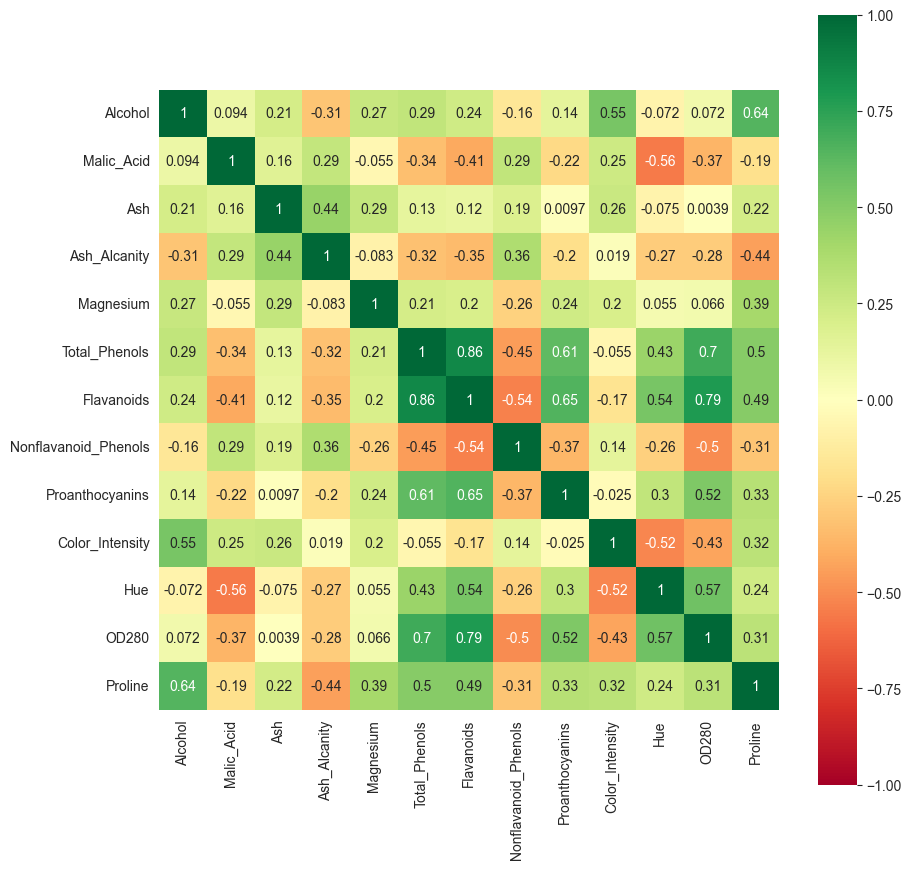

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df_full.corr(), square=True, cmap='RdYlGn', vmin=-1, vmax=1, annot=True)

### Clustering

Teď se podíváme na clustering, tedy rozdělení dat do skupin podle podobnosti. Očekávám, že z datasetu půjde rozdělit vína podle typu – například na bílá, červená nebo růžová.

Všechna data máme kompletní, takže není potřeba nic doplňovat ani upravovat. Před samotným rozdělováním je ale potřeba data převést na stejnou škálu, aby měly všechny sloupce podobný význam pro výpočet.

Nejdříve se proto podíváme na histogramy všech atributů.

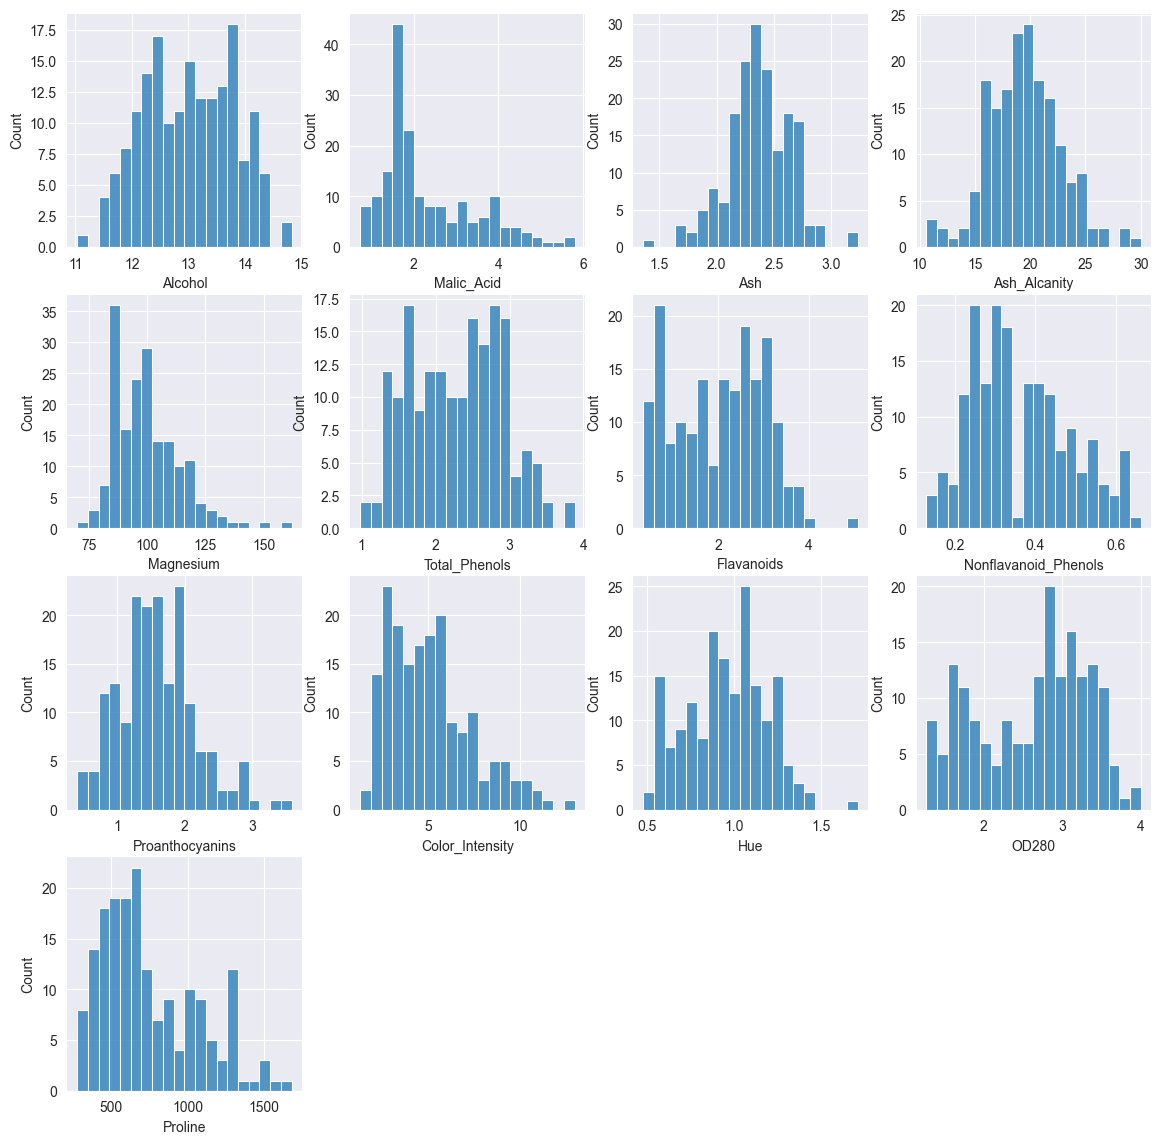

In [13]:
plt.figure(figsize=(14,14))

i = 0
for column in cols:
    i = i + 1
    plt.subplot(4, 4, i)
    sns.histplot(df_full[column], bins=20)

plt.show()

Nejdříve se podíváme na histogramy všech atributů.
Z těch je vidět, že většinu hodnot je možné dobře přeškálovat pomocí MinMax Scaleru.
Jelikož se jednotlivé atributy pohybují v odlišných rozsazích, je vhodné je převést na společný interval 0 až 1, aby měly stejnou váhu při dalším zpracování.

U sloupců Malic_Acid a Magnesium je patrná vyšší šikmost (skewness), takže by bylo možné použít také PowerTransformer. Pro začátek však zvolím jednodušší a univerzální postup — použiji pouze MinMax Scaler.

In [14]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

encoded = pd.DataFrame(index=df_full.index)

encoded[cols] = scaler.fit_transform(df_full[cols])

encoded

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


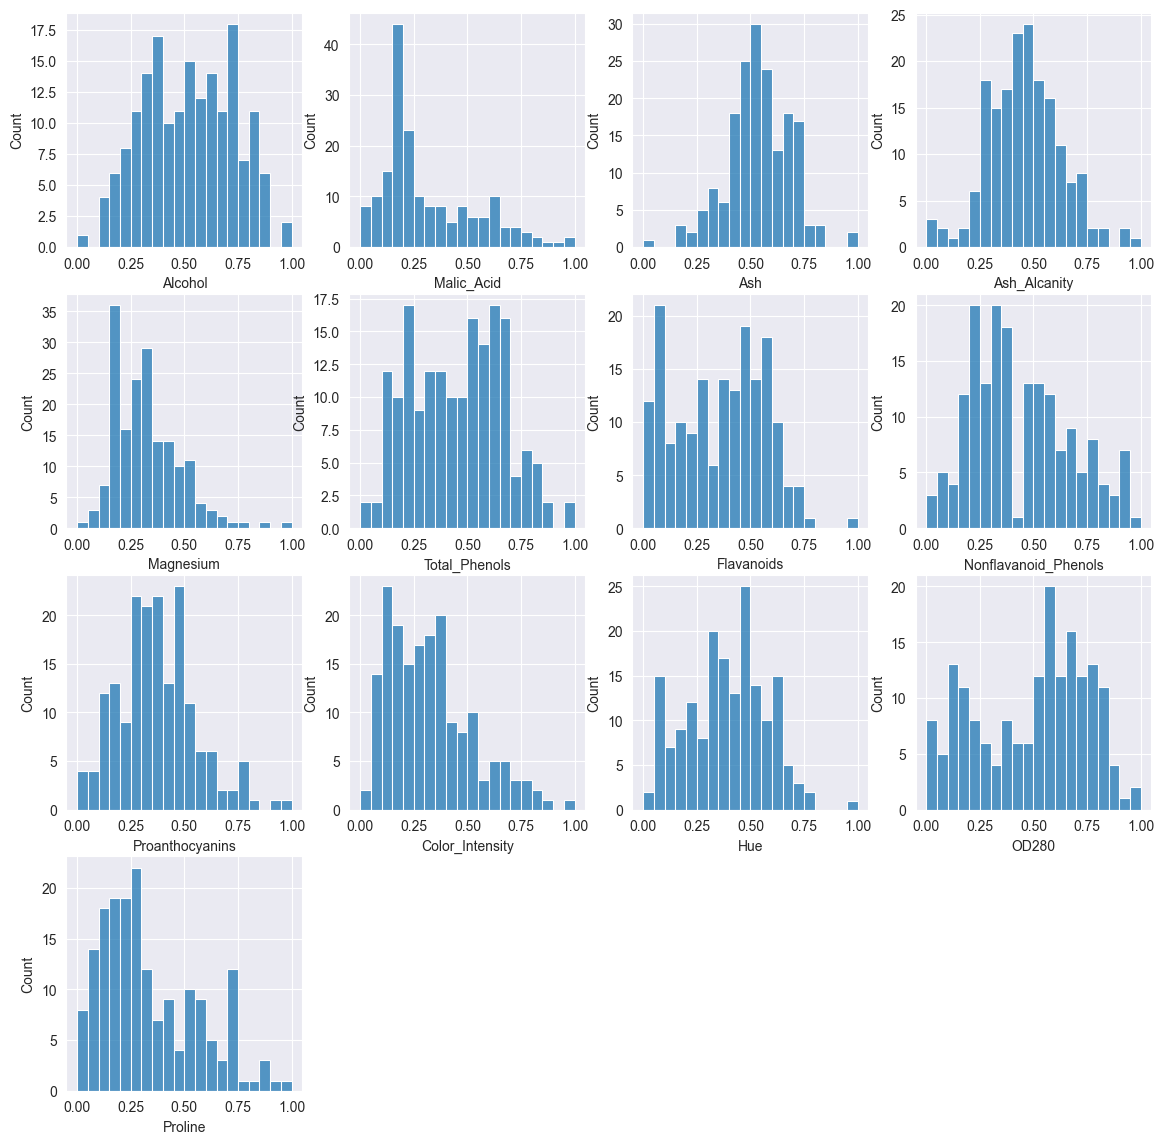

In [15]:
plt.figure(figsize=(14,14))

i = 0
for column in cols:
    i = i + 1
    plt.subplot(4, 4, i)
    sns.histplot(encoded[column], bins=20)

plt.show()

Data máme nyní připravená a z histogramů je jasně vidět, že všechny atributy se už pohybují v rozsahu 0 až 1 díky použití MinMax Scaleru.
Dalším krokem bude určit vhodný počet clusterů. K tomu využiji elbow metodu, která pomůže odhadnout optimální hodnotu k pro následné použití v algoritmu K-Mean

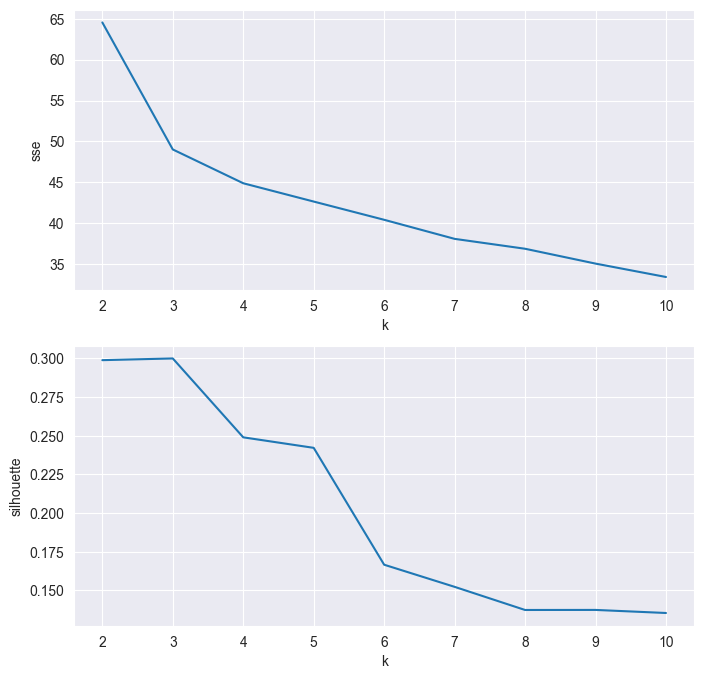

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clustering_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=13).fit(encoded)
    clustering_scores.append({
        'k': k,
        'sse': kmeans.inertia_,
        'silhouette': silhouette_score(encoded, kmeans.labels_)
    })
df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores = df_clustering_scores.set_index('k')

plt.figure(figsize=(8,8))
plt.subplot(2, 1, 1)
sns.lineplot(data = df_clustering_scores, y='sse', x='k')

plt.subplot(2, 1, 2)
sns.lineplot(data = df_clustering_scores, y='silhouette', x='k')

plt.show()

Pokud se podíváme na graf získaný pomocí elbow metody, můžeme vidět, že nejvýraznější změna sklonu (tzv. „loket“) nastává při hodnotě k = 3. To naznačuje, že optimální počet clusterů je právě tři.

U druhého grafu – silhouette score – je nejvyšší hodnota rovněž dosažena při k = 3 (přibližně 0.3), což tento výběr dále potvrzuje.
Z obou metod tedy vyplývá, že vhodný počet clusterů pro K-Means je tři.

V dalším kroku tedy využiji tuto optimální hodnotu a rozdělím data do tří clusterů, abych mohl následně vyhodnotit jejich výslednou strukturu.

In [17]:
kmeans = KMeans(n_clusters=3, random_state=13).fit(encoded)

kmeansEncoded = encoded.copy() # Uděláme si kopii, protože nechceme mít v encoded datech Labely pro druhý type clusteringu

kmeansEncoded["Labels"] = kmeans.labels_
kmeansEncoded

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Labels
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,1
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,1
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,1
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,1
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529,0
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662,0
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290,0
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856,0


Nyní zkontroluji rozložení dat v jednotlivých clusterech, abych se ujistil, že zvolený počet clusterů skutečně dává smysl a odpovídá struktuře dat.

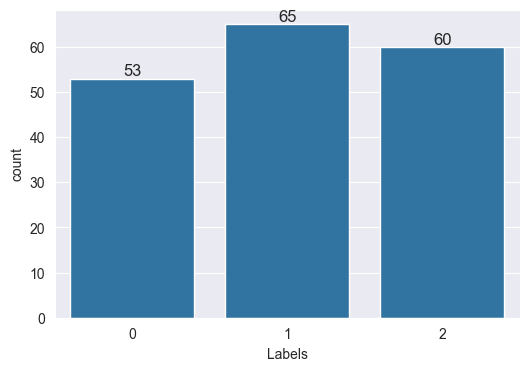

In [18]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=kmeansEncoded, x='Labels')

# Přidání číselných hodnot nad sloupce
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(
        str(count),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom',
        fontsize=12
    )

plt.show()


Jak můžeme vidět z grafu, jednotlivé clustery nejsou rozdělené úplně rovnoměrně, ale jejich velikosti jsou si velmi podobné. To je dobrý signál, protože žádný cluster není ani příliš malý, ani výrazně dominantní.

Vzhledem k tomu, že se clustery vyskytují v podobném poměru, můžeme pokračovat a zaměřit se na to, jaké jsou průměrné hodnoty jednotlivých atributů v rámci každého clusteru. To nám umožní lépe pochopit, čím se clustery liší a jaké mají charakteristiky.

<Axes: ylabel='Labels'>

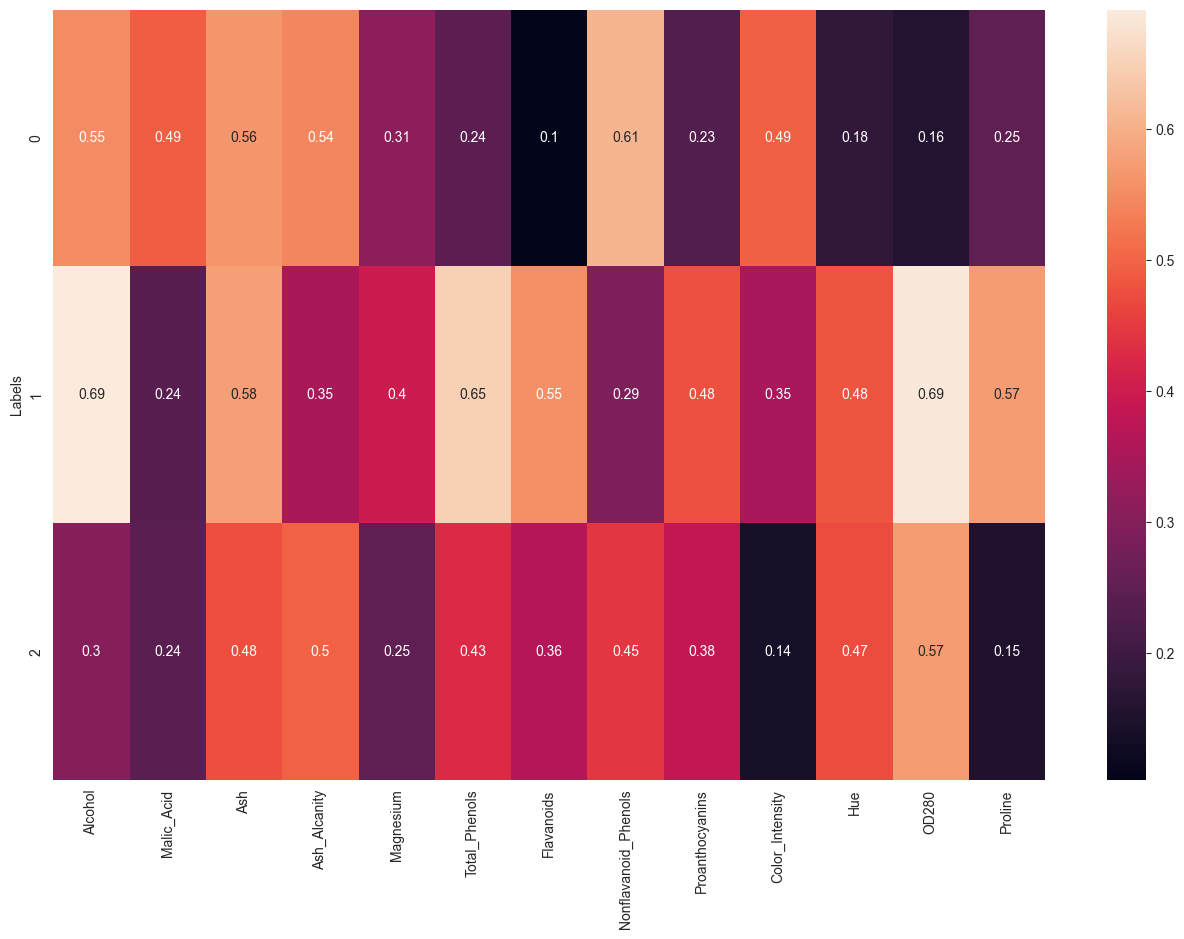

In [19]:
plt.figure(figsize=(16,10))
sns.heatmap(kmeansEncoded.groupby("Labels").mean(), annot=True)

### Cluster 0

Cluster 0 vykazuje vyšší hodnoty zejména u:

- Alcohol
- Nonflavanoid_Phenols

Tyto atributy mají v tomto clusteru relativně největší váhu.

---------------------------------------------------------------------------------------------------------

### Cluster 1

Cluster 1 je nejvýraznější ze všech a je ovlivněn vyššími hodnotami u více atributů, zejména:

- Alcohol
- Total_Phenols
- OD280/OD315
- Proline
- Ash

Tento cluster má tedy poměrně výrazný chemický profil, což může naznačovat konkrétní typ vína nebo jeho kvalitu.

---------------------------------------------------------------------------------------------------------

### Cluster 2

Cluster 2 nemá mnoho atributů s vysokými průměrnými hodnotami — většina leží pod 0.50.
Výraznější je pouze:

- OD280/OD315

Mezi atributy, které mají alespoň mírně zvýšené hodnoty, patří:

- Ash
- OD280/OD315
- Hue
- Nonflavanoid_Phenols

Celkově jde o nejslaběji vyhraněný cluster, což může znamenat buď přechodovou skupinu mezi ostatními dvěma clustery, nebo méně charakteristickou chemickou skladbu.




---------------------------------------------------------------------------------------------------------

Bylo by tedy vhodné podívat se i na skutečné rozložení hodnot v jednotlivých clusterech.
K tomu budu potřebovat přiřadit získané Labels zpět k původním datům.
Následně se podívám na každý atribut zvlášť a porovnám, jak se jeho hodnoty liší mezi jednotlivými clustery.

In [1]:
# napasování labelů na původní data
df_labelsKMeans = df_full.copy()
df_labelsKMeans["Labels"] = kmeansEncoded["Labels"]

col_desc = ["% Alkoholu", "Kys. Jablečná (ostrá chuť)", "Obs. Popela", "Zás. Popela", "Obsah Mg", "Celk. Fenolů (chuť + barva)", "Flavanoidy (hořkost)", "Ne-flav. fenoly (barva + chuť)", "Proantokyanidy (síravost)", "Intenzita barvy", "Odstín", "280mm/315mm", "Prolin (chuť)"]

plt.figure(figsize=(20,20))



i = 0
for col in cols:
    i = i + 1
    plt.subplot(4, 4, i)
    sns.boxplot(data=df_labelsKMeans, x="Labels", y=col)
    plt.xlabel("Cluster")
    plt.ylabel(col_desc[i - 1])
plt.show()

NameError: name 'df_full' is not defined

Nyní na vytvořených histogramech jde vidět, že atribut, jako třeba obsah popela, je všude v clusterech stejný, tudíž tento atribut nám až tolik toho neříká.

Začnu tedy s analýzou jednotlivých clusterů a zkusím si tipnout, o jaké víno se jedná. Výsledky předám také AI, aby zkusila odhadnout, o jaký typ vína se jedná.


### Cluster 0 – středně silné, ostřejší a výrazněji barevné víno
Charakteristika:

- Střední obsah alkoholu
- Vyšší obsah kyseliny jablečné to obvykle značí ostřejší a kyselejší profil vína
- Nízké flavonoidy, nízký obsah fenolů, ale vyšší obsah neflavonoidních fenolů méně hořkosti, ale ostřejší dochuť
- Nízké proanthokyany nižší tříslovitost (méně suché v puse)
- Velmi vysoká intenzita barvy
- Střední hodnota OD280/OD315 (průměrná kvalita fenolů)
- Střední až nižší prolin (může ukazovat na mladší víno)

Pravděpodobný typ vína:
může jít o mladší, kyselejší víno s výraznější barvou, spíše méně komplexní v chuti
(Např. jednodušší červené víno s ostřejším profilem.)

### Cluster 1 – kvalitnější, bohatší a komplexnější víno
Charakteristika:

- Nejvyšší obsah alkoholu zralejší hrozny, kvalitnější víno
- Vyšší obsah fenolů, flavonoidů i neflavonoidních fenolů větší komplexnost chuti
- Nejvyšší OD280/OD315 obvykle značí vyšší kvalitu vína
- Vyšší proanthokyany více tříslovin (plnější tělo, více suchosti)
- Vyšší prolin také indikátor vyšší kvality hroznů
- Střední intenzita barvy (u kvalitních vín bývá barva stabilní, ne extrémní)

Pravděpodobný typ vína:
Vyšší kategorie, komplexní, aromatické a strukturou bohatší červené víno
(Něco jako kvalitní Cabernet Sauvignon / Merlot.)

### Cluster 2 – lehčí, méně alkoholické a méně intenzivní víno
Charakteristika:

- Nejnižší obsah alkoholu
- Nízký obsah kyseliny jablečné spíše jemnější, méně ostré víno
- Nízké fenoly i flavonoidy méně hořkosti, méně komplexní chuť
- Velmi nízký prolin může jít o méně zralé hrozny
- Nízká intenzita barvy
- Nižší OD280/OD315 slabší fenolická struktura

Pravděpodobný typ vína:

Lehčí, méně výrazné červené víno (příp. nižší kvalita) např. levnější stolní vína nebo odrůdy s lehkou strukturou.


### Moje interpretace vs AI (shrnutí)

Níže tabulka srovnává krátce, co si myslím já (autor) a co AI navrhla jako odhad typu vína.

| Cluster | Moje interpretace (krátce) | AI (odhad) |
|---|---|---|
| Cluster 0 | Středně silné, ostřejší, výrazná barva, nižší fenoly — mladší, kyselejší červené | Jednoduché mladé červené s ostřejším profilem |
| Cluster 1 | Kvalitnější, vyšší alkohol, bohaté fenoly a prolin — komplexní červené | Prémiové, aromatické červené (např. Cabernet / Merlot) |
| Cluster 2 | Lehčí, nejnižší alkohol, nízké fenoly — méně intenzivní červené | Lehké, méně výrazné stolní červené (případně bílé/růžové) |




## Druhá metoda: Bisecting K-Means

Jako druhý algoritmus jsem zvolil Bisecting K-Means, což je hierarchický přístup vycházející z klasického K-Meansu. Tento algoritmus začíná vytvořením jednoho velkého clusteru, který následně opakovaně rozděluje na dva menší clustery.
Proces pokračuje tak dlouho, dokud není dosaženo požadovaného počtu clusterů.

Bisecting K-Means může být efektivnější než klasický K-Means zejména v situacích, kdy je požadovaný počet clusterů větší, protože díky postupnému dělení bývá stabilnější a méně citlivý na špatnou počáteční inicializaci.

Nyní se tedy zaměřím na určení optimálního počtu clusterů, opět pomocí elbow metody.

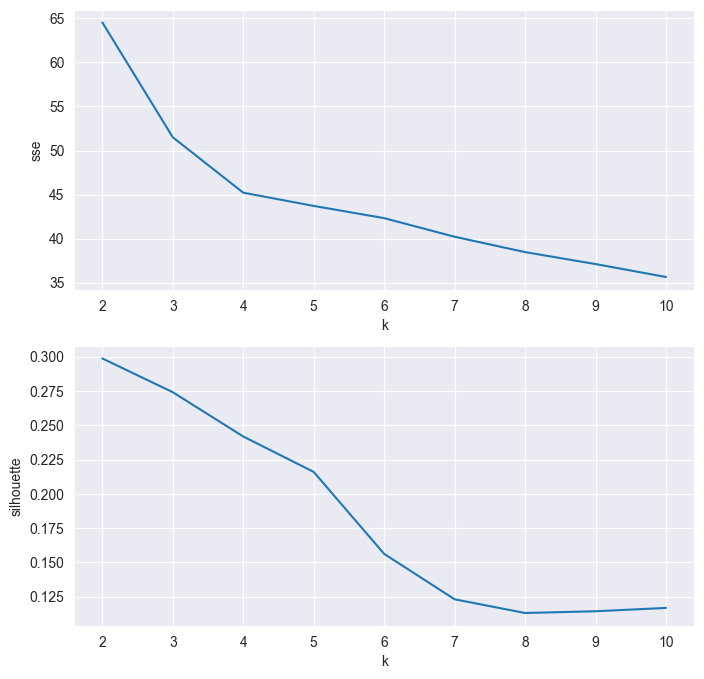

In [21]:
from sklearn.cluster import BisectingKMeans
from sklearn.metrics import silhouette_score

clustering_scores = []
for k in range(2, 11):
    bisKmeans = BisectingKMeans(n_clusters=k, random_state=13).fit(encoded)
    clustering_scores.append({
        'k': k,
        'sse': bisKmeans.inertia_,
        'silhouette': silhouette_score(encoded, bisKmeans.labels_)
    })
df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores = df_clustering_scores.set_index('k')

plt.figure(figsize=(8,8))
plt.subplot(2, 1, 1)
sns.lineplot(data = df_clustering_scores, y='sse', x='k')

plt.subplot(2, 1, 2)
sns.lineplot(data = df_clustering_scores, y='silhouette', x='k')

plt.show()

Pokud se podíváme na výsledné grafy, opět je patrné, že nejvýraznější „loket“ v rámci elbow metody nastává při hodnotě k = 3. To znamená, že i u Bisecting K-Meansu se jako optimální počet clusterů jeví právě tři.

U druhého grafu — silhouette score — je nejvyšší hodnota také dosažena při k = 3. Oproti klasickému K-Meansu však vidíme mírně vyšší hodnoty silhouette skóre, což naznačuje o něco lepší separaci clusterů.

Na základě obou metrik tedy zvolím 3 clustery jako optimální počet.

In [22]:
bisKmeans = BisectingKMeans(n_clusters=3, random_state=13).fit(encoded)

bisEncoded = encoded.copy() # Sice nebudeme provádět další clustering, ale chcene mechat encoded data čístá od labels

bisEncoded["Labels"] = bisKmeans.labels_
bisEncoded

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Labels
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,1
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,1
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,1
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,1
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529,0
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662,0
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290,0
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856,0


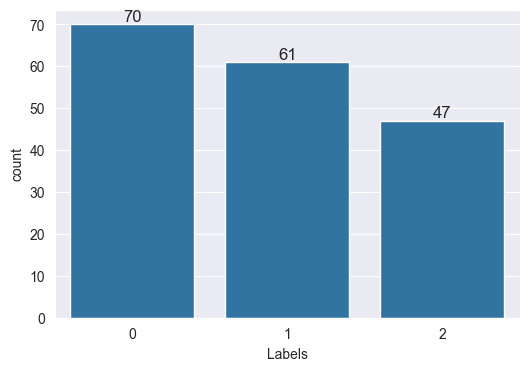

In [25]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=bisEncoded, x='Labels')

# Přidání číselných hodnot nad sloupce
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(
        str(count),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom',
        fontsize=12
    )

plt.show()

Nyni muzeme videt ze rozlozeni dopadlo trochu jinak. Nejvetsi zastoupeni ma nyni v clusteru 0. A pak postupne je kazdy cuslter mensi.

Dale bych se podival na prumerne hodnoty v jednotlivych clusterech.

<Axes: ylabel='Labels'>

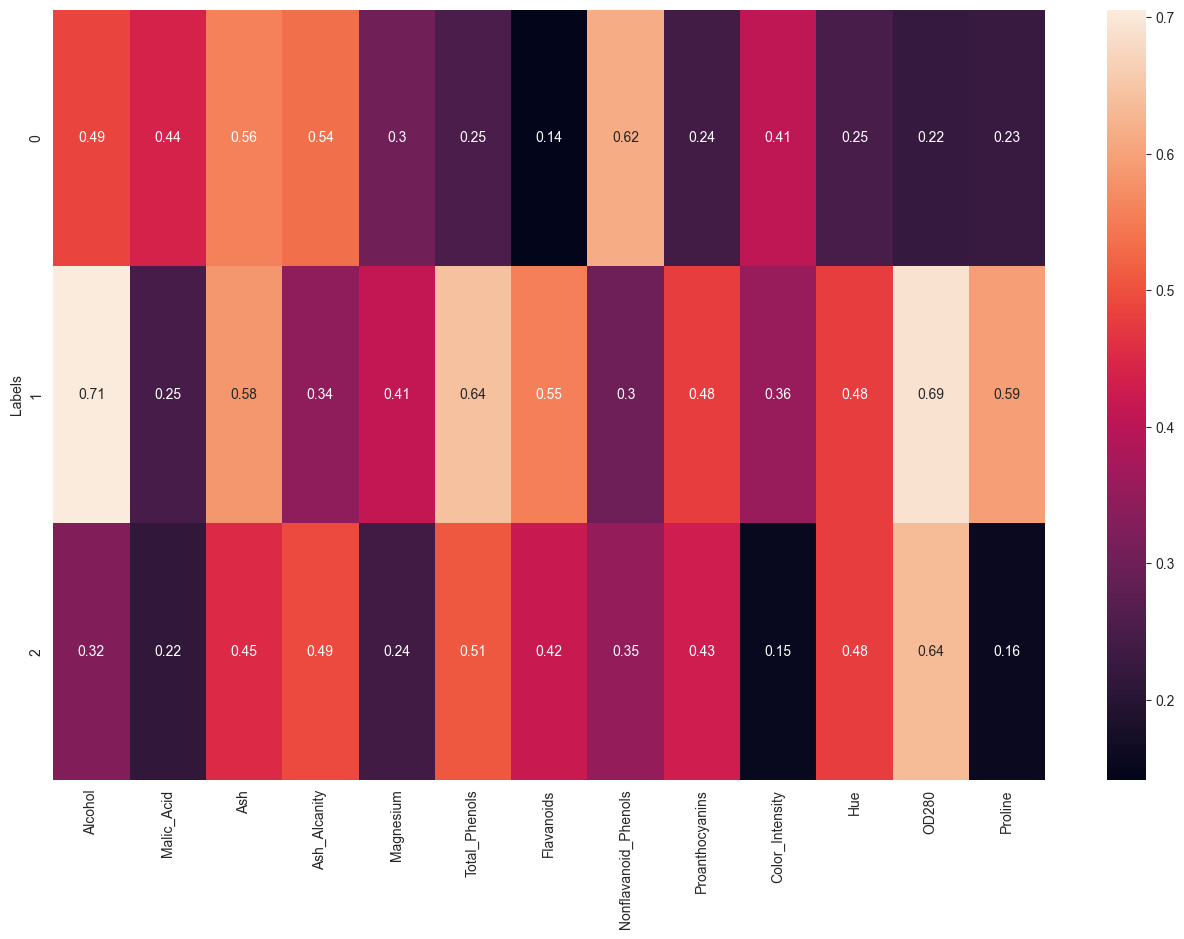

In [26]:
plt.figure(figsize=(16,10))
sns.heatmap(bisEncoded.groupby("Labels").mean(), annot=True)

# Interpretace heatmapy – Bisecting K-Means

## Cluster 0
U clustru 0 vidíme mírně zvýšené hodnoty u:

- Ash
- Ash_Alcalinity
- Proanthocyanins
- Nonflavanoid_Phenols
- Hue
- OD280/OD315

Žádný atribut ale výrazně nevyčnívá nad ostatní (většina hodnot je v rozmezí 0.20–0.55).
Cluster 0 tedy představuje střední, spíše vyrovnaný profil bez dominantních chemických znaků.

## Cluster 1
Cluster 1 má nejvýraznější chemický profil. Vyšší hodnoty zde najdeme u:

- Alcohol
- Total_Phenols
- Proanthocyanins
- Flavanoids
- OD280/OD315
- Proline
- Ash

Jedná se tedy o cluster s nejbohatším chemickým složením, což může indikovat vína s vyšší kvalitou nebo jiným typologickým zařazením.

## Cluster 2
Cluster 2 má nižší hodnoty většiny atributů, ale mírně zvýšené jsou:

- Total_Phenols
- Flavanoids
- OD280/OD315
- Ash

Žádný atribut výrazně nevyčnívá — všechny hodnoty jsou pod ~0.55.
Cluster 2 tak představuje méně výraznou skupinu s celkově nižšími hodnotami většiny chemických parametrů, podobně jako slaběji vyhraněná varianta mezi clusterem 0 a 1.

# Porovnani metod

Dame si tedy ty heat mapy vedle setbe a podivame se jak se mezi sebou lisi.

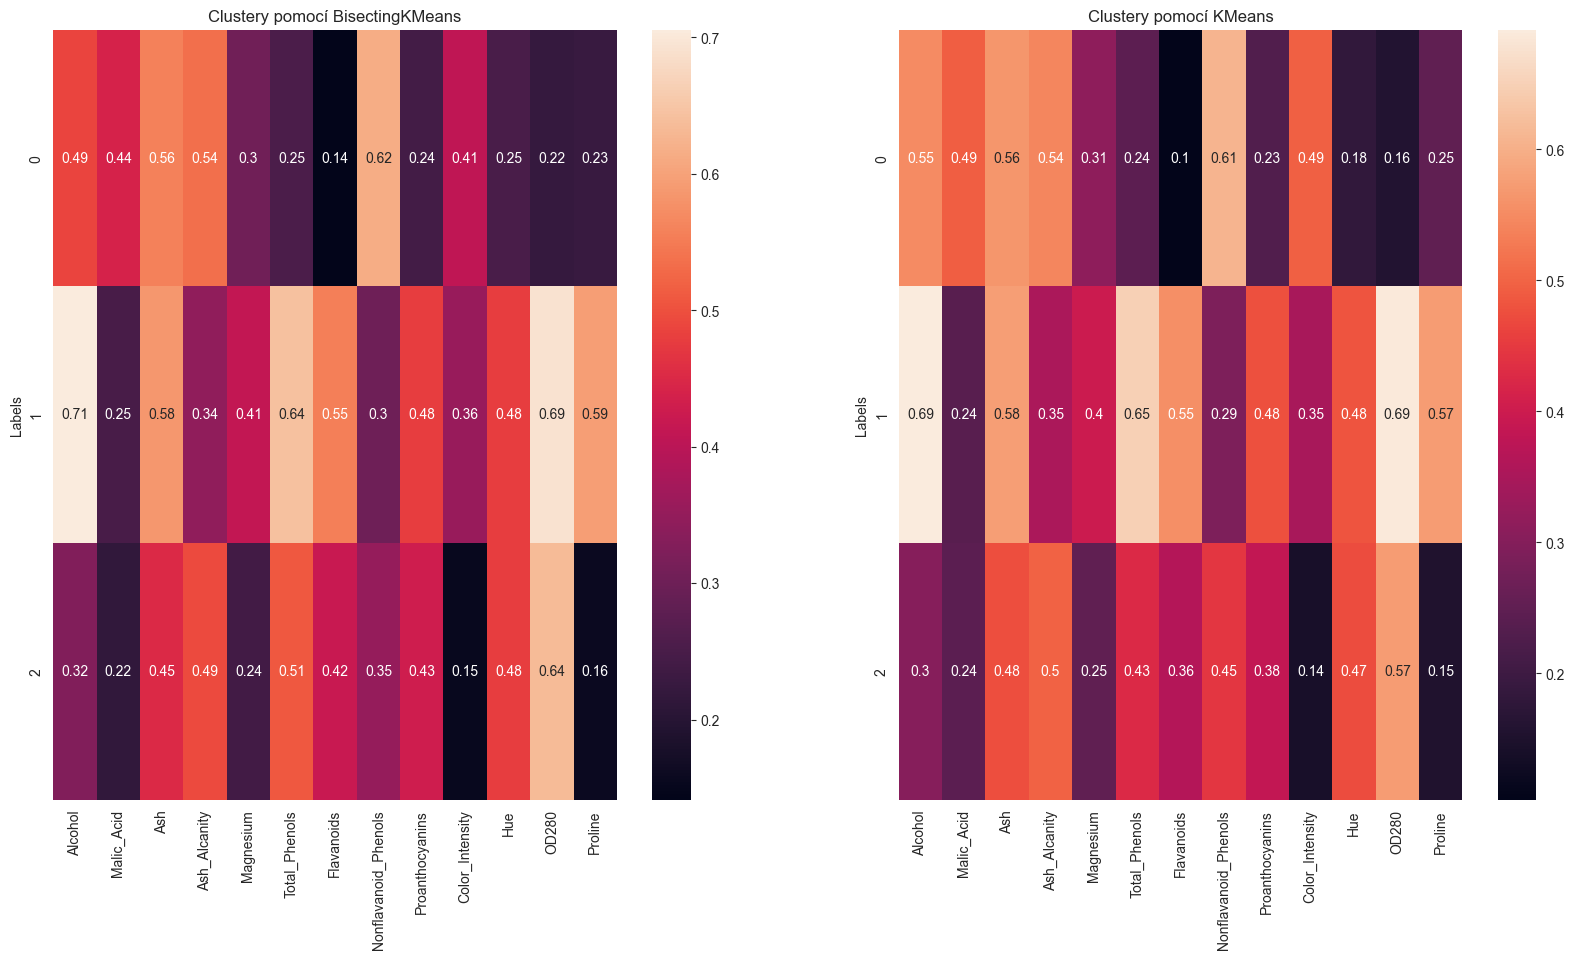

In [27]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.heatmap(bisEncoded.groupby("Labels").mean(), annot=True)
plt.title("Clustery pomocí BisectingKMeans")
plt.subplot(1, 2, 2)
sns.heatmap(kmeansEncoded.groupby("Labels").mean(), annot=True)
plt.title("Clustery pomocí KMeans")
plt.show()

Po prozkoumání obou heatmap lze říct, že výsledky obou metod jsou si velmi podobné, pouze s několika menšími rozdíly u jednotlivých atributů. Abych porovnal metody ještě detailněji, podívám se nyní na rozložení skutečných hodnot v jednotlivých clusterech.

Proto si zobrazím vedle sebe výsledky z prvního clusterování (K-Means) a druhého clusterování (Bisecting K-Means), abych mohl přímo porovnat, jak se liší jejich rozdělení dat.

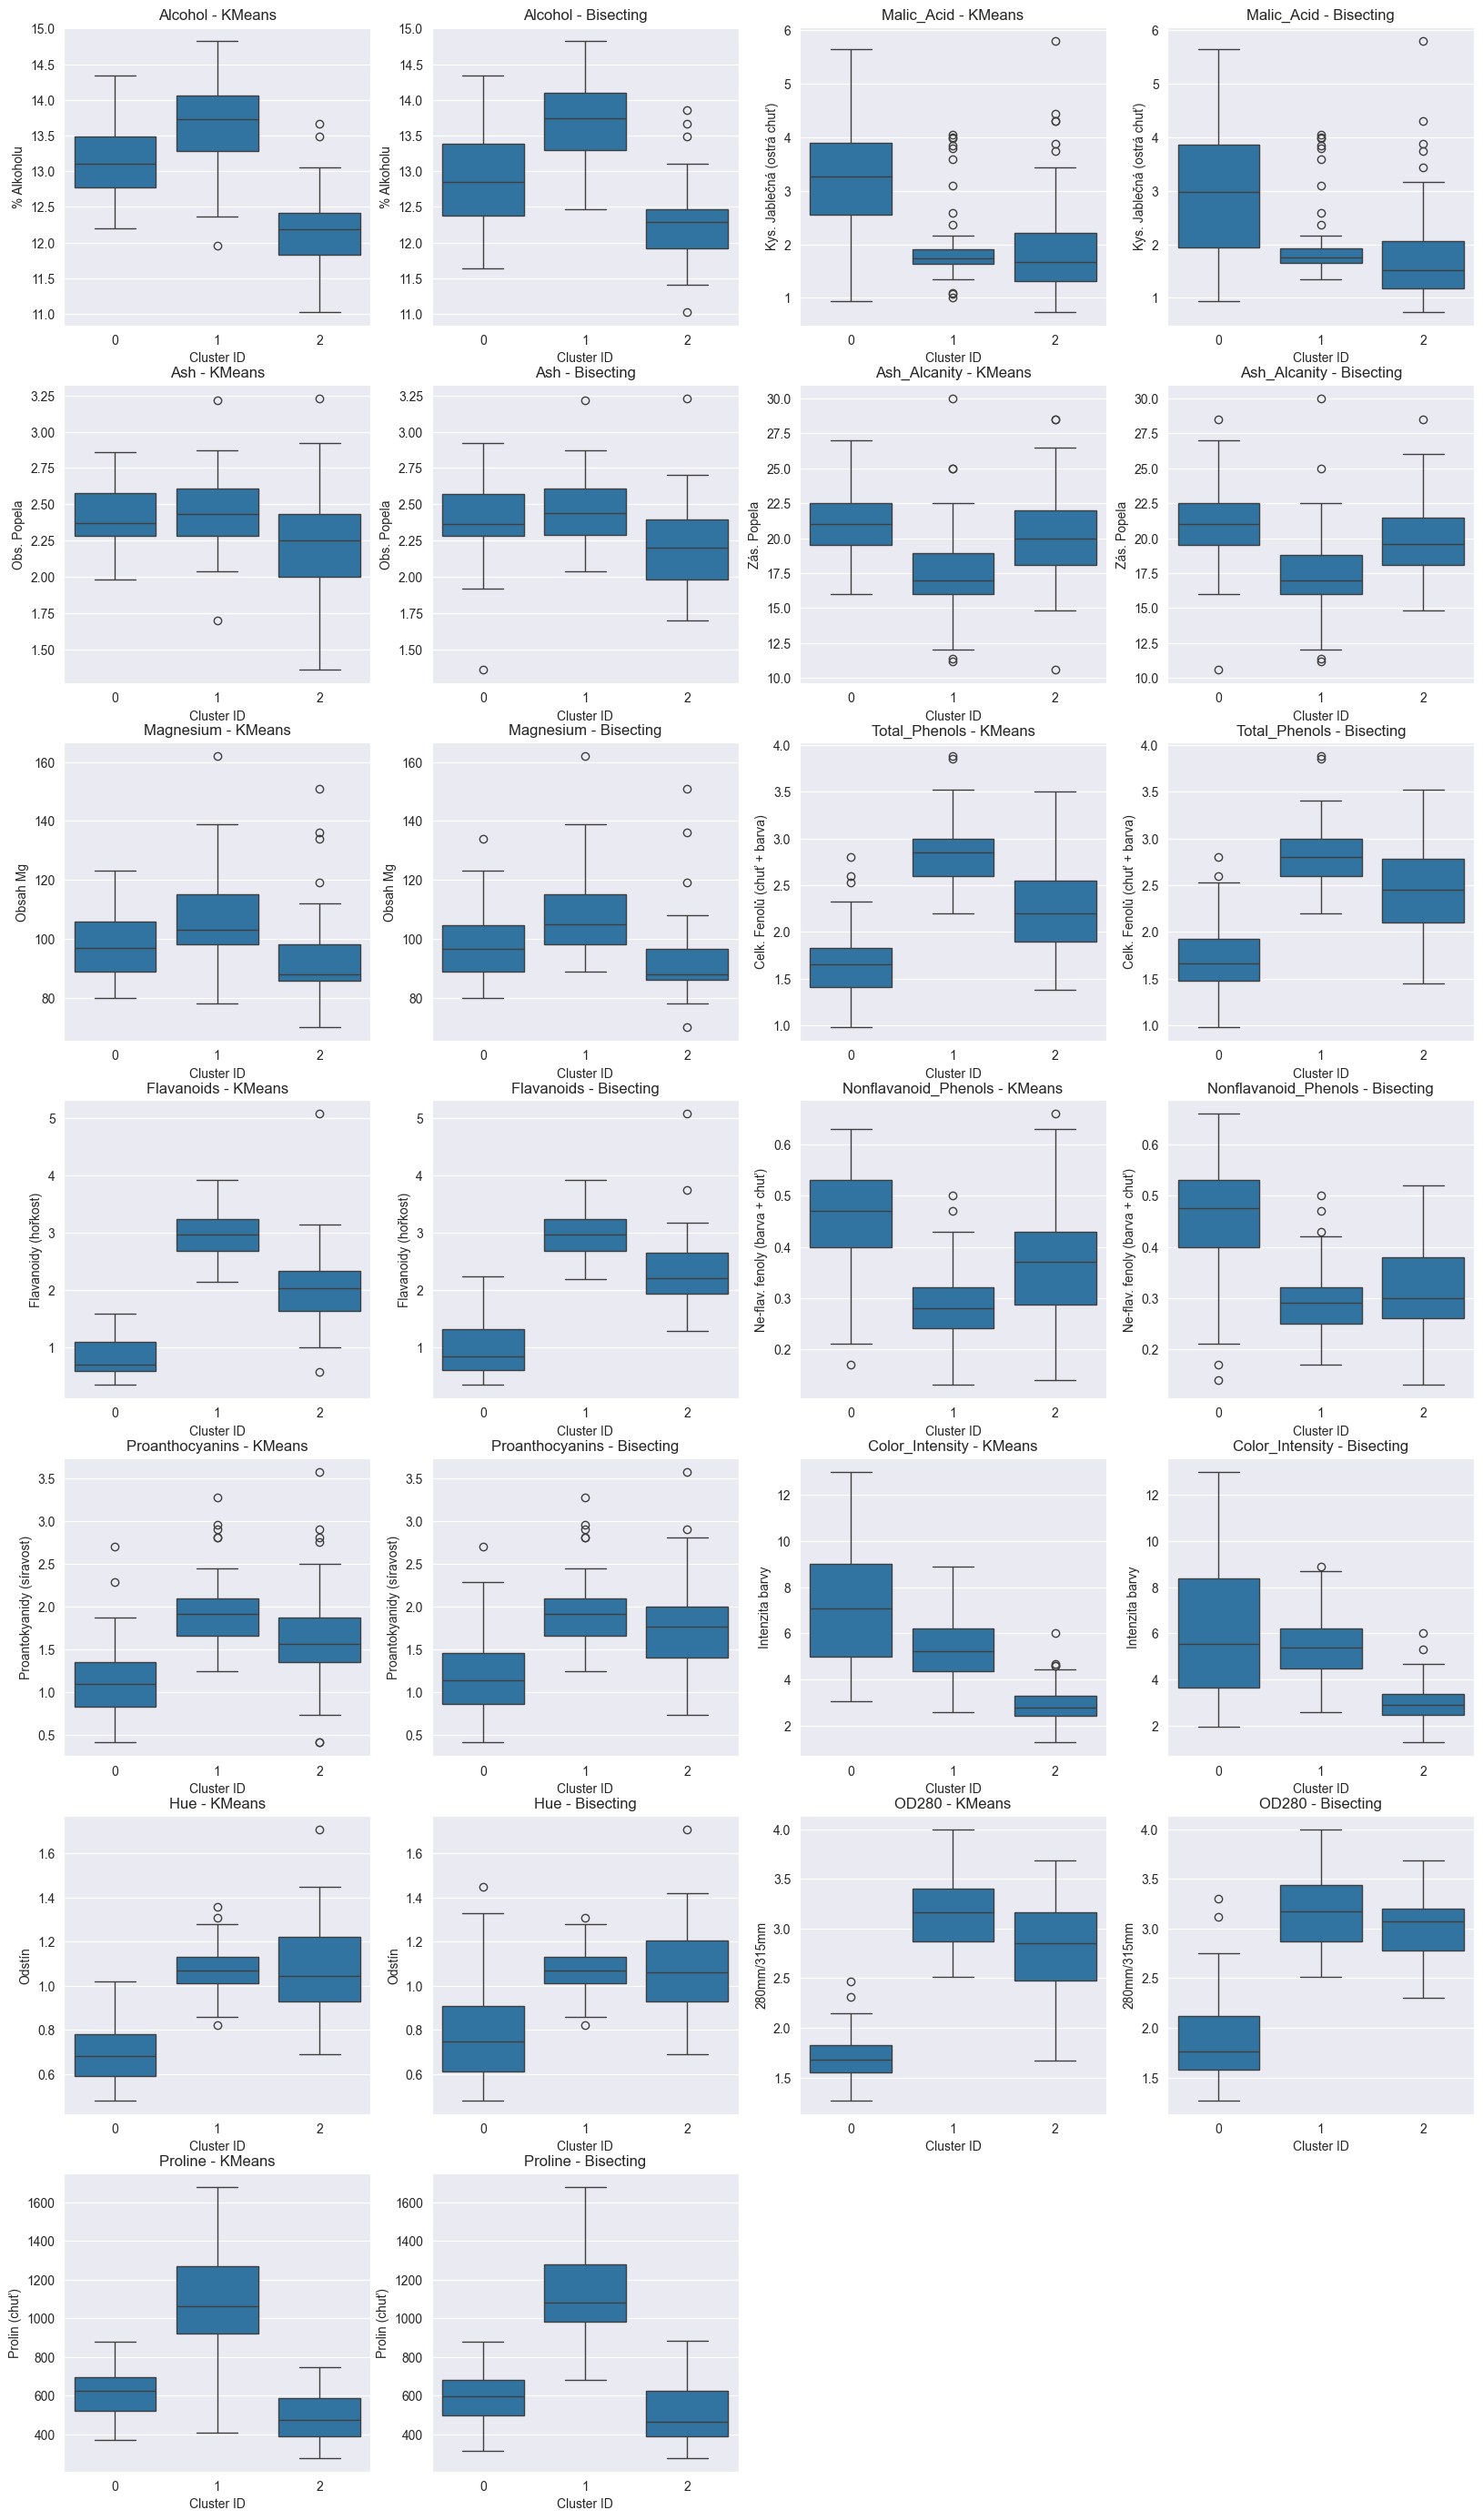

In [28]:
# napasování labelů na původní data
df_labelsBisKMeans = df_full.copy()
df_labelsBisKMeans["Labels"] = bisEncoded["Labels"]


plt.figure(figsize=(20,40))

i = 0
idx = 0;
for col in cols:
    idx = idx + 1
    i = i + 1
    plt.subplot(8, 4, i)
    sns.boxplot(data=df_labelsKMeans, x="Labels", y=col)
    plt.xlabel("Cluster ID")
    plt.ylabel(col_desc[idx - 1])
    plt.title(col + " - " + "KMeans")
    i = i + 1
    plt.subplot(8, 4, i)
    sns.boxplot(data=df_labelsBisKMeans, x="Labels", y=col)
    plt.xlabel("Cluster ID")
    plt.ylabel(col_desc[idx - 1])
    plt.title(col + " - " + "Bisecting")
plt.show()

Po prozkoumání rozložení skutečných hodnot u obou metod můžeme vidět, že výsledky jsou si velmi podobné, a to jak ve tvaru rozptylu, tak v celkovém trendu jednotlivých atributů.
Rozdíly se objevují spíše v menších odchylkách středních hodnot nebo velikosti variací, ale celková struktura clusterů je v obou případech prakticky stejná.

To potvrzuje, že zvolené parametry i celkový postup byly vhodné a obě metody vedly k velmi konzistentnímu rozdělení dat. Dá se tedy říct, že rozdělení, které jsem získal pomocí K-Means, by Bisecting K-Means vytvořil velmi podobné — ne-li téměř totožné.

# Závěr

V rámci této analýzy jsem provedl porovnání dvou clusteringových metod – K-Means a Bisecting K-Means – nad datovou sadou obsahující chemické parametry vín. Ačkoliv osobně nejsem znalcem vín, zvolil jsem tento dataset proto, že mě zajímalo, jak chemické složení může ovlivňovat rozlišování jednotlivých druhů.

Obě metody vedly ke konzistentnímu výsledku: optimální počet clusterů byl tři. To je zajímavé zejména proto, že z běžných znalostí o víně víme, že se vína často dělí do tří základních kategorií podle chuti – suché, polosuché a sladké. Stejně tak existují tři hlavní barevné typy vín – červené, bílé a růžové.

Na základě samotných dat nemohu s jistotou potvrdit, zda získané clustery přesně odpovídají těmto kategoriím. Je však dobře možné, že se v datasetu nachází různé druhy vín a že chemické parametry skutečně zachycují rozdíly mezi nimi. Obě použité metody vytvořily téměř totožné rozdělení, což naznačuje, že struktura dat je stabilní a clustering je smysluplný.

